In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras import layers, models

In [3]:
# Define paths to your dataset
train_data_dir = './train'
test_data_dir = './test'

In [4]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [5]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.


In [7]:
# Load ResNet50 pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))



94765736/94765736 [==============================] - 17s 0us/step


In [8]:
# Freeze the convolutional layers
base_model.trainable = False

In [9]:
# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10


68/68 [==============================] - 120s 2s/step - loss: 0.6931 - accuracy: 0.5384 - val_loss: 0.6846 - val_accuracy: 0.5572
Epoch 2/10
68/68 [==============================] - 123s 2s/step - loss: 0.6909 - accuracy: 0.5365 - val_loss: 0.6827 - val_accuracy: 0.5166
Epoch 3/10
68/68 [==============================] - 125s 2s/step - loss: 0.6897 - accuracy: 0.5361 - val_loss: 0.6818 - val_accuracy: 0.5129
Epoch 4/10
68/68 [==============================] - 134s 2s/step - loss: 0.6785 - accuracy: 0.5691 - val_loss: 0.6683 - val_accuracy: 0.6199
Epoch 5/10
68/68 [==============================] - 126s 2s/step - loss: 0.6782 - accuracy: 0.5658 - val_loss: 0.6651 - val_accuracy: 0.6310
Epoch 6/10
68/68 [==============================] - 119s 2s/step - loss: 0.6759 - accuracy: 0.5724 - val_loss: 0.6663 - val_accuracy: 0.5756
Epoch 7/10
68/68 [==============================] - 121s 2s/step - loss: 0.6727 - accuracy: 0.5863 - val_loss: 0.6613 - val_accuracy: 0.5904
Epoch 8/10


In [13]:
# Save the trained model
model.save('26_11_2023_(23_37)_drowsiness_detection_resnet.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Plot the training and validation curves
import matplotlib.pyplot as plt

In [15]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

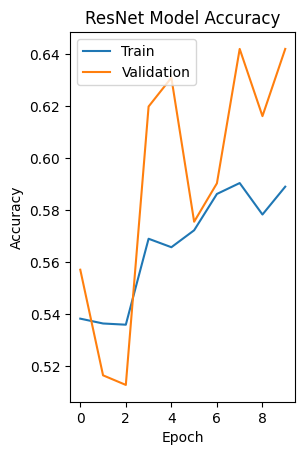

In [16]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

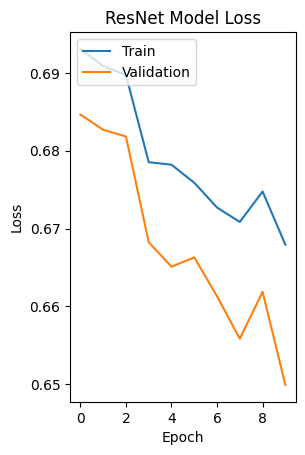

In [17]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras import layers, models

# Define paths to your dataset
train_data_dir = './train'
test_data_dir = './test'
val_data_dir = './val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 20

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load ResNet50 pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the trained model
model.save('30_11_2023_(17_57)_drowsiness_detection_resnet.h5')

Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
Epoch 1/20


34/34 [==============================] - 141s 4s/step - loss: 0.7418 - 

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
